<a href="https://www.kaggle.com/code/vibhorejain1/ps4e2-0-90-eda-xgboost?scriptVersionId=163117233" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv
/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
df=pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
df_t=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
df_l=pd.read_csv("/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv")

In [3]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df_l.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df_l.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [6]:
df_l.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
df_l.duplicated().sum()

24

In [8]:
df_l.drop_duplicates(inplace=True)

In [9]:
df.shape

(20758, 18)

In [10]:
df=pd.concat([df,df_l])

In [11]:
df_t.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [12]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000
mean,10378.50000,23.888513,1.700467,87.793761,2.443675,2.755837,2.027165,0.984585,0.620984
std,5992.46278,5.755338,0.087865,26.363367,0.533392,0.711185,0.608479,0.839728,0.602802
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.755907,0.015860,0.000000
50%,10378.50000,22.815416,1.700000,84.000000,2.393837,3.000000,2.000000,1.000000,0.582840
75%,15567.75000,26.000000,1.763029,111.531208,3.000000,3.000000,2.531984,1.600431,1.000000
max,20757.00000,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# sns.heatmap(df.corr())

In [15]:
df.drop(columns=['id'],inplace=True)
df_t.drop(columns=['id'],inplace=True)

In [16]:
numerical_f=[x for x in df.columns if df[x].dtype!='object']

In [17]:
numerical_f

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

<Axes: >

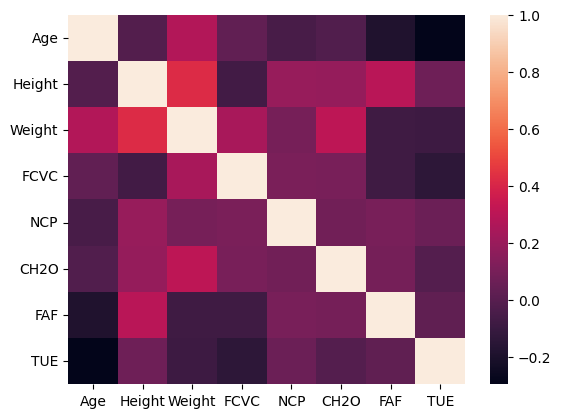

In [18]:
sns.heatmap(df[numerical_f].corr())

In [19]:
df.shape

(22845, 17)

In [20]:
df[numerical_f].corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.013651,0.274242,0.031932,-0.049868,-0.019410,-0.187307,-0.295965
Height,-0.013651,1.000000,0.420378,-0.068603,0.194916,0.187121,0.295141,0.073194
Weight,0.274242,0.420378,1.000000,0.243146,0.095784,0.307656,-0.082338,-0.086041
FCVC,0.031932,-0.068603,0.243146,1.000000,0.105874,0.099610,-0.079544,-0.144048
NCP,-0.049868,0.194916,0.095784,0.105874,1.000000,0.080630,0.103246,0.061741
CH2O,-0.019410,0.187121,0.307656,0.099610,0.080630,1.000000,0.090439,-0.008021
FAF,-0.187307,0.295141,-0.082338,-0.079544,0.103246,0.090439,1.000000,0.024954
TUE,-0.295965,0.073194,-0.086041,-0.144048,0.061741,-0.008021,0.024954,1.000000


In [21]:
df['BMI']=df['Weight']/pow(df['Height'],2)
df_t['BMI']=df_t['Weight']/pow(df_t['Height'],2)

In [22]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


In [23]:
# df.drop(columns=['Height','Weight'],inplace=True)
# df_t.drop(columns=['Height','Weight'],inplace=True)

In [24]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


In [25]:
categorical_f=[x for x in df.columns if df[x].dtype=='object']

In [26]:
categorical_f

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [27]:
df[categorical_f].nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              4
MTRANS                            5
NObeyesdad                        7
dtype: int64

In [28]:
df['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    18736
no      4109
Name: count, dtype: int64

In [29]:
df.rename(columns={'FAVC':'Frequent_consumption_of_high_caloric_food',
                   'FCVC':'Frequency_of_consumption_of_vegetables',
                   'NCP':'Number_of_main_meals',
                   'CAEC':'Consumption_of_food_between_meals',
                   'CH2O':'Consumption_of_water_daily',
                   'SCC':'Calories_consumption_monitoring',
                   'FAF':'Physical_activity_frequency',
                   'TUE':'Time using_technology_devices',
                   'CALC':'Consumption_of_alcohol',
                   'MTRANS':'Transportation_used'}, inplace=True)
df_t.rename(columns={'FAVC':'Frequent_consumption_of_high_caloric_food',
                   'FCVC':'Frequency_of_consumption_of_vegetables',
                   'NCP':'Number_of_main_meals',
                   'CAEC':'Consumption_of_food_between_meals',
                   'CH2O':'Consumption_of_water_daily',
                   'SCC':'Calories_consumption_monitoring',
                   'FAF':'Physical_activity_frequency',
                   'TUE':'Time using_technology_devices',
                   'CALC':'Consumption_of_alcohol',
                   'MTRANS':'Transportation_used'}, inplace=True)

In [30]:
df['family_history_with_overweight']=df['family_history_with_overweight'].map({'yes':1.0,'no':0})
df_t['family_history_with_overweight']=df_t['family_history_with_overweight'].map({'yes':1.0,'no':0})

In [31]:
df['Frequent_consumption_of_high_caloric_food'].value_counts()

Frequent_consumption_of_high_caloric_food
yes    20826
no      2019
Name: count, dtype: int64

In [32]:
df['Frequent_consumption_of_high_caloric_food']=df['Frequent_consumption_of_high_caloric_food'].map({'yes':1.0,'no':0.0})
df_t['Frequent_consumption_of_high_caloric_food']=df_t['Frequent_consumption_of_high_caloric_food'].map({'yes':1.0,'no':0.0})

In [33]:
df['SMOKE']=df['SMOKE'].map({'yes':0.0,'no':1.0})
df_t['SMOKE']=df_t['SMOKE'].map({'yes':0.0,'no':1.0})

In [34]:
df['Calories_consumption_monitoring']=df['Calories_consumption_monitoring'].map({'yes':0.0,'no':1.0})
df_t['Calories_consumption_monitoring']=df_t['Calories_consumption_monitoring'].map({'yes':0.0,'no':1.0})

In [35]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,Frequent_consumption_of_high_caloric_food,Frequency_of_consumption_of_vegetables,Number_of_main_meals,Consumption_of_food_between_meals,SMOKE,Consumption_of_water_daily,Calories_consumption_monitoring,Physical_activity_frequency,Time using_technology_devices,Consumption_of_alcohol,Transportation_used,NObeyesdad,BMI
0,Male,24.443011,1.699998,81.669950,1.0,1.0,2.000000,2.983297,Sometimes,1.0,2.763573,1.0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,Female,18.000000,1.560000,57.000000,1.0,1.0,2.000000,3.000000,Frequently,1.0,2.000000,1.0,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,Female,18.000000,1.711460,50.165754,1.0,1.0,1.880534,1.411685,Sometimes,1.0,1.910378,1.0,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,Female,20.952737,1.710730,131.274851,1.0,1.0,3.000000,3.000000,Sometimes,1.0,1.674061,1.0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,Male,31.641081,1.914186,93.798055,1.0,1.0,2.679664,1.971472,Sometimes,1.0,1.979848,1.0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


In [36]:
df.shape

(22845, 18)

In [37]:
df_t.shape

(13840, 17)

In [38]:
num_features = df.select_dtypes(exclude="object").columns
cat_features=df.select_dtypes(include="object").columns

In [39]:
numerical_f=[x for x in df.columns if df[x].dtype!='object']

In [40]:
df[num_features].corr()

,Age,Height,Weight,family_history_with_overweight,Frequent_consumption_of_high_caloric_food,Frequency_of_consumption_of_vegetables,Number_of_main_meals,SMOKE,Consumption_of_water_daily,Calories_consumption_monitoring,Physical_activity_frequency,Time using_technology_devices,BMI
Age,1.000000,-0.013651,0.274242,0.255291,0.056803,0.031932,-0.049868,-0.061070,-0.019410,0.109322,-0.187307,-0.295965,0.312133
Height,-0.013651,1.000000,0.420378,0.228497,0.122355,-0.068603,0.194916,-0.067811,0.187121,0.100286,0.295141,0.073194,0.100398
Weight,0.274242,0.420378,1.000000,0.512163,0.233481,0.243146,0.095784,-0.038082,0.307656,0.187179,-0.082338,-0.086041,0.940457
family_history_with_overweight,0.255291,0.228497,0.512163,1.000000,0.158143,0.046379,0.043057,-0.018336,0.189451,0.169244,-0.091471,0.005537,0.497342
Frequent_consumption_of_high_caloric_food,0.056803,0.122355,0.233481,0.158143,1.000000,0.004007,0.010287,0.021331,0.035744,0.121892,-0.071914,0.037915,0.218784
Frequency_of_consumption_of_vegetables,0.031932,-0.068603,0.243146,0.046379,0.004007,1.000000,0.105874,0.009402,0.099610,-0.026991,-0.079544,-0.144048,0.294248
Number_of_main_meals,-0.049868,0.194916,0.095784,0.043057,0.010287,0.105874,1.000000,-0.005988,0.080630,-0.003066,0.103246,0.061741,0.047115
SMOKE,-0.061070,-0.067811,-0.038082,-0.018336,0.021331,0.009402,-0.005988,1.000000,0.024605,0.021732,-0.008885,0.011632,-0.010941
Consumption_of_water_daily,-0.019410,0.187121,0.307656,0.189451,0.035744,0.099610,0.080630,0.024605,1.000000,0.027597,0.090439,-0.008021,0.279205
Calories_consumption_monitoring,0.109322,0.100286,0.187179,0.169244,0.121892,-0.026991,-0.003066,0.021732,0.027597,1.000000,-0.063247,0.007979,0.177187


In [41]:
import matplotlib.pyplot as plt

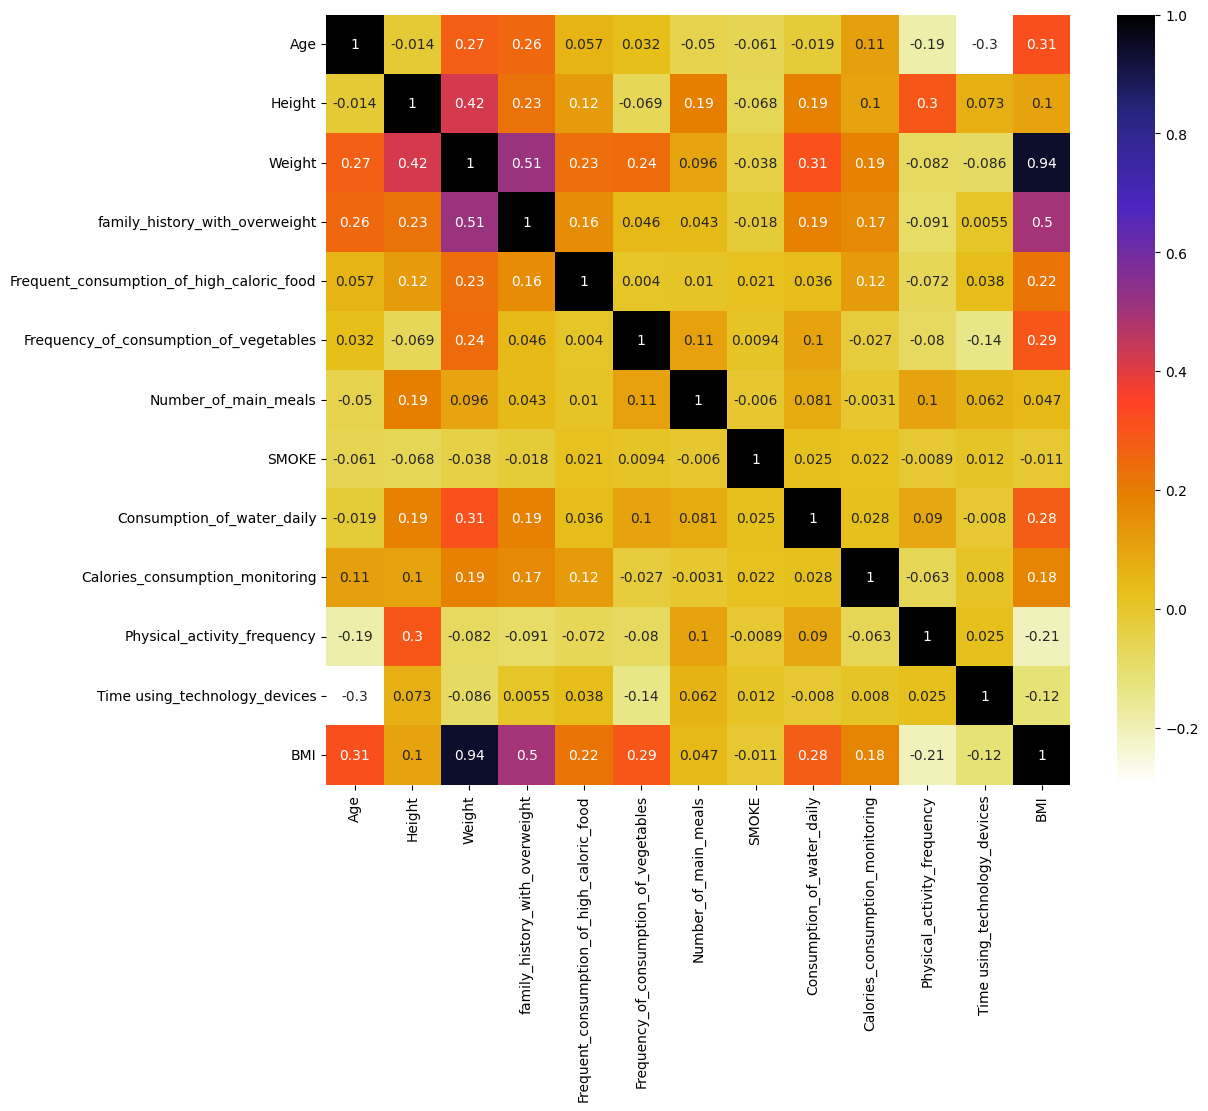

In [42]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=df[num_features].corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [43]:
X=df.drop(columns=['NObeyesdad'])
y=df['NObeyesdad']

In [44]:
y.head()

0    Overweight_Level_II
1          Normal_Weight
2    Insufficient_Weight
3       Obesity_Type_III
4    Overweight_Level_II
Name: NObeyesdad, dtype: object

In [45]:
X.shape

(22845, 17)

In [46]:
df_t.shape

(13840, 17)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((18276, 17), (4569, 17))

In [48]:
# X[num_features].corr

In [49]:
num_features = X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

In [50]:
num_features,cat_features

(Index(['Age', 'Height', 'Weight', 'family_history_with_overweight',
        'Frequent_consumption_of_high_caloric_food',
        'Frequency_of_consumption_of_vegetables', 'Number_of_main_meals',
        'SMOKE', 'Consumption_of_water_daily',
        'Calories_consumption_monitoring', 'Physical_activity_frequency',
        'Time using_technology_devices', 'BMI'],
       dtype='object'),
 Index(['Gender', 'Consumption_of_food_between_meals', 'Consumption_of_alcohol',
        'Transportation_used'],
       dtype='object'))

In [51]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [52]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [53]:
# X_train=oh_transformer.fit_transform(X_train)
# X_test=oh_transformer.transform(X_test)

In [54]:
X_train.shape

(18276, 28)

In [55]:
X_train[0]

array([ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
       -0.19097691, -0.00448878,  0.29019811,  0.4688964 ,  0.31102328,
       -0.83341842,  0.34768288,  0.11511099, -0.04283896,  0.18832796,
       -1.17683324,  0.62334004,  0.34036566])

In [56]:
##variance threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(X_train)

array([[ 0.        ,  1.        ,  0.        , ..., -1.17683324,
         0.62334004,  0.34036566],
       [ 0.        ,  1.        ,  0.        , ..., -0.89871079,
         0.02184639,  0.12588294],
       [ 1.        ,  0.        ,  0.        , ..., -1.17683324,
        -0.35017701,  1.19511121],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.20991033,
         0.62334004, -2.02861354],
       [ 1.        ,  0.        ,  0.        , ..., -1.17683324,
        -0.65741479,  1.41609397],
       [ 0.        ,  1.        ,  0.        , ...,  1.20991033,
         0.62334004, -0.2987853 ]])

In [57]:
X_train.shape

(18276, 28)

In [58]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train=le.fit_transform(y_train)

In [60]:
y_test=le.transform(y_test)

In [61]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score
from catboost import CatBoostClassifier

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(true,predicted):
  accuracy = accuracy_score(true,predicted)
  precision = precision_score(true,predicted,average='weighted')
  recall = recall_score(true,predicted,average='weighted')
  f1 = f1_score(true,predicted,average='weighted')
  return accuracy,precision,recall,f1

In [63]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False),
    "AdaBoost": AdaBoostClassifier()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_accuracy,model_train_precision,model_train_recall,model_train_f1  = evaluate_model(y_train, y_train_pred)

    model_test_accuracy,model_test_precision,model_test_recall,model_test_f1 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- accuracy: {:.4f}".format(model_train_accuracy))
    print("- precision: {:.4f}".format(model_train_precision))
    print("- recall: {:.4f}".format(model_train_recall))
    print("- f1: {:.4f}".format(model_train_f1))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- accuracy: {:.4f}".format(model_test_accuracy))
    print("- precision: {:.4f}".format(model_test_precision))
    print("- recall: {:.4f}".format(model_test_recall))
    print("- f1: {:.4f}".format(model_train_f1))
#     r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- accuracy: 0.8737
- precision: 0.8727
- recall: 0.8737
- f1: 0.8729
----------------------------------
Model performance for Test set
- accuracy: 0.8674
- precision: 0.8658
- recall: 0.8674
- f1: 0.8729


KNN
Model performance for Training set
- accuracy: 0.8577
- precision: 0.8565
- recall: 0.8577
- f1: 0.8565
----------------------------------
Model performance for Test set
- accuracy: 0.7940
- precision: 0.7912
- recall: 0.7940
- f1: 0.8565


SVM
Model performance for Training set
- accuracy: 0.9057
- precision: 0.9057
- recall: 0.9057
- f1: 0.9056
----------------------------------
Model performance for Test set
- accuracy: 0.8812
- precision: 0.8808
- recall: 0.8812
- f1: 0.9056


Decision Tree
Model performance for Training set
- accuracy: 1.0000
- precision: 1.0000
- recall: 1.0000
- f1: 1.0000
----------------------------------
Model performance for Test set
- accuracy: 0.8490
- precision: 0.8483
- recall: 0.8490
- f1: 1.0

In [64]:
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [65]:
# model1=CatBoostClassifier(verbose=False)
# model1.fit(X_train,y_train)

In [66]:
df_c=df_t.copy()

In [67]:
# df_t=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

In [68]:
# df_t.head()

In [69]:
df_t=preprocessor.transform(df_t)

In [70]:
# test_pred_enco1=model1.predict(df_t)

In [71]:
test_pred_enco=model.predict(df_t)

In [72]:
# test_pred_enco1

In [73]:
test_pred_enco

array([3, 5, 4, ..., 0, 1, 3])

In [74]:
# test_pred1 = le.inverse_transform(test_pred_enco1)

In [75]:
test_pred = le.inverse_transform(test_pred_enco)

In [76]:
# test_pred1

In [77]:
test_pred

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [78]:
df_tt=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

In [79]:
# submi1=pd.DataFrame({'id':df_tt['id'],
#                    'NObeyesdad':test_pred1})

In [80]:
submi=pd.DataFrame({'id':df_tt['id'],
                   'NObeyesdad':test_pred})

In [81]:
submi.to_csv('submission.csv',index=False)